<a href="https://colab.research.google.com/github/LFormigoni/Primeiros-passos-com-ML/blob/main/03_Treinando_uma_Rede.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iremos treinar a rede para predizer o genero de uma pessoa dado seu peso e altura
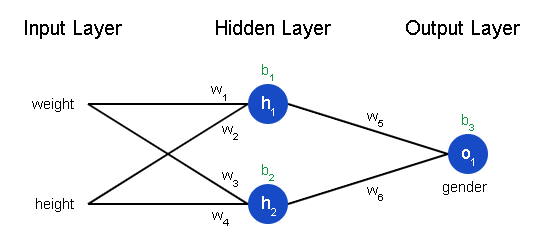

Bibliotecas e definições que serão utilizadas

In [1]:
import numpy as np

#definir a função Sigmoide
def sigmoide(x):
  return 1/(1+np.exp(-x))

#define a derivada da função Sigmoide
def sigmoide_derivada(x):
  fx = sigmoide(x)
  return fx*(1-fx)

#define a perda da função erro quadratico médio (MSE)
def mse_loss(y_real,y_calculado): #y_real é o valor real já y_calculado é o valor encontrado pela RN     
  return ((y_real - y_calculado)**2).mean()


Criação de classes e atribuição de valores 

In [2]:
class RNclassificadora:
 #a função np.random.normal foi utilizada para atribuir valores aos pesos e vieses em cada neuronio, contudo a escolha dessa função é meramente ilustrativa
  def __init__(self):
    #pesos
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    #vieses
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self,x):
    h1 = sigmoide(self.w1 * x[0] +self.w2 * x[1] +self.b1)
    h2 = sigmoide(self.w3 * x[0] +self.w4 * x[1] +self.b2)
    o1 = sigmoide(self.w5 * h1 +self.w6 * h2 +self.b3)
    return o1

#treinaremos a rede utilizando todos os valores reais fornecidos
  def treino(self, data, y_reais):
    tx_aprend = 0.1
    epocas = 1000 #é o número de loops que serão realizados

    for epoca in range(epocas):
      for x, y_real in zip(data,y_reais):
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoide(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoide(sum_h2)

        sum_o1 = self.w5 * h1 +self.w6 * h2 + self.b3
        o1 = sigmoide(sum_o1)
        y_calculado = o1

#calculo das derivadas parciais
#chamando dev_L_dev_calc a derivada parcial de L pela parcial de w1
        dev_L_dev_calc = -2*(y_real - y_calculado)

        #Neuronio o1
        d_y_calc_d_w5 = h1 *sigmoide_derivada(sum_o1)
        d_y_calc_d_w6 = h2 *sigmoide_derivada(sum_o1)
        d_y_calc_d_b3 = sigmoide_derivada(sum_o1)

        d_y_calc_d_h1 = self.w5 * sigmoide_derivada(sum_o1)
        d_y_calc_d_h2 = self.w6 * sigmoide_derivada(sum_o1)

        #Neuronio h1 
        d_h1_d_w1 = x[0] * sigmoide_derivada(sum_h1)
        d_h1_d_w2 = x[1] * sigmoide_derivada(sum_h1)
        d_h1_d_b1 = sigmoide_derivada(sum_h1)

        #Neuronio h2
        d_h2_d_w3 = x[0] * sigmoide_derivada(sum_h2)
        d_h2_d_w4 = x[1] * sigmoide_derivada(sum_h2)
        d_h2_d_b2 = sigmoide_derivada(sum_h2)

        #atualização de pesos e vieses
        #neuronio h1
        self.w1 -= tx_aprend * dev_L_dev_calc * d_y_calc_d_h1 * d_h1_d_w1
        self.w2 -= tx_aprend * dev_L_dev_calc * d_y_calc_d_h1 * d_h1_d_w2
        self.b1 -= tx_aprend * dev_L_dev_calc * d_y_calc_d_h1 * d_h1_d_b1

        #neuronio h2
        self.w3 -= tx_aprend * dev_L_dev_calc * d_y_calc_d_h2 * d_h2_d_w3
        self.w4 -= tx_aprend * dev_L_dev_calc * d_y_calc_d_h2 * d_h2_d_w4
        self.b2 -= tx_aprend * dev_L_dev_calc * d_y_calc_d_h2 * d_h2_d_b2

        #Neuronio o1
        self.w5 -= tx_aprend * dev_L_dev_calc * d_y_calc_d_w5
        self.w6 -= tx_aprend * dev_L_dev_calc * d_y_calc_d_w6
        self.b3 -= tx_aprend * dev_L_dev_calc * d_y_calc_d_b3

      #calculo de perdas totais no final de cada época
      if epoca % 10 == 0:
        y_calculados  = np.apply_along_axis(self.feedforward, 1, data)
        perda = mse_loss(y_reais,y_calculados)
        print ("Epoca %d perda equivalente à %.3f" %(epoca,perda))



Definindo o dataset de treinamento, considerando o primeiro valor o peso em kg e a altura em cm

Para os y reais adotamos 1 para mulheres e 0 para homens


In [3]:
data = np.array([
                 [60,165], #ana
                 [72,182], #joao
                 [68,172], #jose
                 [54,60], #maria
])
y_reais = np.array([
                    1,  #ana
                    0,  #joao
                    0,  #jose
                    1,  #maria
])

rede = RNclassificadora()

rede.treino(data, y_reais)

Epoca 0 perda equivalente à 0.288
Epoca 10 perda equivalente à 0.267
Epoca 20 perda equivalente à 0.257
Epoca 30 perda equivalente à 0.253
Epoca 40 perda equivalente à 0.251
Epoca 50 perda equivalente à 0.250
Epoca 60 perda equivalente à 0.250
Epoca 70 perda equivalente à 0.250
Epoca 80 perda equivalente à 0.250
Epoca 90 perda equivalente à 0.250
Epoca 100 perda equivalente à 0.250
Epoca 110 perda equivalente à 0.250
Epoca 120 perda equivalente à 0.250
Epoca 130 perda equivalente à 0.250
Epoca 140 perda equivalente à 0.250
Epoca 150 perda equivalente à 0.250
Epoca 160 perda equivalente à 0.250
Epoca 170 perda equivalente à 0.250
Epoca 180 perda equivalente à 0.250
Epoca 190 perda equivalente à 0.250
Epoca 200 perda equivalente à 0.250
Epoca 210 perda equivalente à 0.250
Epoca 220 perda equivalente à 0.250
Epoca 230 perda equivalente à 0.250
Epoca 240 perda equivalente à 0.250
Epoca 250 perda equivalente à 0.250
Epoca 260 perda equivalente à 0.250
Epoca 270 perda equivalente à 0.250
Epo

Testando a rede 


In [4]:
nath = np.array([60, 165])
leandro = np.array([83,179])

print("Nathália : %.3f" % rede.feedforward(nath))  #Lembrando, valores próximos a 1 = feminino
print("Leandro : %.3f" % rede.feedforward(leandro))  #Valores próximos a 0 = masculino

Nathália : 0.500
Leandro : 0.500
